<a href="https://colab.research.google.com/github/DoLoottle/javascript/blob/master/svm_for_de_ransomware.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ransomware detection Flow chart**

Pour ce projet, nous allons suivre les étapes suivantes :

*   Exploration du Dataset
*   Selection des features clés
*   visualisation des données
*   nettoyage de données
*   normalisation des données
*   construction du modèle
*   entraînement du modèle
*   Test




# **Exploration des données**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Read RansomWare dataset
df = pd.read_csv("/content/drive/MyDrive/Ransomware/RansomwareData.csv", header=None)

In [ ]:
# Read Variables names
df_label = pd.read_csv("/content/drive/MyDrive/Ransomware/VariableNames.txt", sep=";",error_bad_lines=False, header=None)

b'Skipping line 14704: expected 2 fields, saw 3\nSkipping line 14705: expected 2 fields, saw 3\nSkipping line 14706: expected 2 fields, saw 3\nSkipping line 14707: expected 2 fields, saw 3\nSkipping line 14708: expected 2 fields, saw 3\nSkipping line 14709: expected 2 fields, saw 3\nSkipping line 14710: expected 2 fields, saw 3\nSkipping line 14711: expected 2 fields, saw 3\nSkipping line 14712: expected 2 fields, saw 3\nSkipping line 14713: expected 2 fields, saw 3\nSkipping line 14714: expected 2 fields, saw 3\nSkipping line 14715: expected 2 fields, saw 3\nSkipping line 14716: expected 2 fields, saw 3\nSkipping line 14717: expected 2 fields, saw 3\nSkipping line 14718: expected 2 fields, saw 3\nSkipping line 14719: expected 2 fields, saw 3\nSkipping line 14720: expected 2 fields, saw 3\nSkipping line 14721: expected 2 fields, saw 3\nSkipping line 14722: expected 2 fields, saw 3\nSkipping line 14723: expected 2 fields, saw 3\nSkipping line 14724: expected 2 fields, saw 3\nSkipping li

In [ ]:
# Data description 
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,30930,30931,30932,30933,30934,30935,30936,30937,30938,30939,30940,30941,30942,30943,30944,30945,30946,30947,30948,30949,30950,30951,30952,30953,30954,30955,30956,30957,30958,30959,30960,30961,30962,30963,30964,30965,30966,30967,30968,30969
count,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.0,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,...,1524.000000,1524.000000,1524.000000,1524.0,1524.0,1524.000000,1524.000000,1524.0,1524.000000,1524.0,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.000000,1524.0,1524.000000,1524.0,1524.000000,1524.0,1524.0,1524.0,1524.0,1524.000000,1524.000000,1524.0,1524.000000,1524.000000,1524.0,1524.0,1524.000000,1524.000000,1524.000000,1524.0,1524.0,1524.000000,1524.0,1524.0,1524.000000
mean,16801.751312,0.381890,2.029528,0.295932,0.003281,0.692257,0.001969,0.518373,0.027559,0.509186,0.044619,0.303806,0.000656,0.263780,0.086614,0.135171,0.514436,0.353018,0.035433,0.011811,0.045932,0.002625,0.013123,0.002625,0.489501,0.366142,0.007874,0.005249,0.001969,0.136483,0.101706,0.024278,0.0,0.036745,0.051837,0.662073,0.059055,0.023622,0.980315,0.007874,...,0.000656,0.000656,0.000656,0.0,0.0,0.001312,0.000656,0.0,0.001312,0.0,0.000656,0.000656,0.000656,0.000656,0.000656,0.001312,0.0,0.000656,0.0,0.000656,0.0,0.0,0.0,0.0,0.000656,0.000656,0.0,0.000656,0.000656,0.0,0.0,0.001312,0.000656,0.000656,0.0,0.0,0.000656,0.0,0.0,0.001312
std,4884.048213,0.486009,3.165149,0.456610,0.057203,0.461711,0.044339,0.499826,0.163759,0.500080,0.206535,0.460051,0.025616,0.440826,0.281361,0.342018,0.499956,0.478065,0.184932,0.108070,0.209406,0.051181,0.113840,0.051181,0.500054,0.481907,0.088415,0.072286,0.044339,0.343413,0.302361,0.153962,0.0,0.188198,0.221771,0.473159,0.235805,0.151918,0.138961,0.088415,...,0.025616,0.025616,0.025616,0.0,0.0,0.036214,0.025616,0.0,0.036214,0.0,0.025616,0.025616,0.025616,0.025616,0.025616,0.036214,0.0,0.025616,0.0,0.025616,0.0,0.0,0.0,0.0,0.025616,0.025616,0.0,0.025616,0.025616,0.0,0.0,0.036214,0.025616,0.025616,0.0,0.0,0.025616,0.0,0.0,0.036214
min,10001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,10805.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
50%,20231.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,

# **Selection des features**

In [ ]:
df_label

,0,1
0,1,ID
1,2,Label (1 Ransomware / 0 Goodware)
2,3,Ransomware Family
3,4,API:GetSystemDirectoryA
4,5,API:WriteConsoleA
...,...,...
14698,14699,DIR:ENUMERATED:C:\Documents and Settings\MyUse...
14699,14700,DIR:ENUMERATED:C:\ProgramData\Microsoft\Windows\
14700,14701,DIR:ENUMERATED:C:\Python27\DLLs\
14701,14702,DIR:ENUMERATED:C:\Documents and Settings\MyUse...


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,30930,30931,30932,30933,30934,30935,30936,30937,30938,30939,30940,30941,30942,30943,30944,30945,30946,30947,30948,30949,30950,30951,30952,30953,30954,30955,30956,30957,30958,30959,30960,30961,30962,30963,30964,30965,30966,30967,30968,30969
0,10001,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10002,1,3,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,10003,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10005,1,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10006,1,7,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,21254,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1520,21255,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1521,21256,0,0,0,0,1,0,1,0,1,1,1,0,0,1,0,1,1,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1522,21258,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# select target column in df 
df_target = df.iloc[:,1]

In [ ]:
# count the number of goodware and number of ransomware
ransom_num = df_target[df_target == 1].count()
goodware_num = df_target[df_target == 0].count()
print(f"number of ransomware is : {ransom_num}")
print(f"number of goodware is : {goodware_num}")

number of ransomware is : 582
number of goodware is : 942


In [ ]:
# The potential features
df_features = df.iloc[:,3:]

In [ ]:
# Mutual information criterion
from sklearn.feature_selection import mutual_info_classif

# number max of features
thresold =  65

# most relevant features
high_score_features = []

features_scores = mutual_info_classif(df_features, df_target, random_state=0)

for score, f_index in sorted(zip(features_scores, df_features.columns), reverse=True)[:thresold]:
    print(score, df_label[df_label[0] == f_index][1])
    high_score_features.append(f_index)


0.3090103369710613 120    API:OpenSCManagerW
Name: 1, dtype: object
0.2750141951410845 14265    DIR:ENUMERATED:C:\CvMSPxIo\drop\
Name: 1, dtype: object
0.22333768220018158 11684    FILES_EXT:OPENED:tmp\it
Name: 1, dtype: object
0.2170645091408674 330    DROP:addon
Name: 1, dtype: object
0.1692441480000757 8    API:WriteConsoleW
Name: 1, dtype: object
0.16765379123599877 12041    FILES_EXT:WRITTEN:addon
Name: 1, dtype: object
0.1671191541310597 168    API:Process32FirstW
Name: 1, dtype: object
0.15184657293659454 65    API:UuidCreate
Name: 1, dtype: object
0.14902487196274627 12242    FILES_EXT:WRITTEN:chm
Name: 1, dtype: object
0.14526971574277003 3365    REG:OPENED:HKEY_LOCAL_MACHINE\SOFTWARE\Microso...
Name: 1, dtype: object
0.1420769017202812 2016    REG:OPENED:HKEY_CURRENT_USER\SOFTWARE\Microsof...
Name: 1, dtype: object
0.1336282541095717 225    API:GetFileType
Name: 1, dtype: object
0.12970693227156205 149    API:GetVolumePathNamesForVolumeNameW
Name: 1, dtype: object
0.128979231

# Visualisation des distributions de features

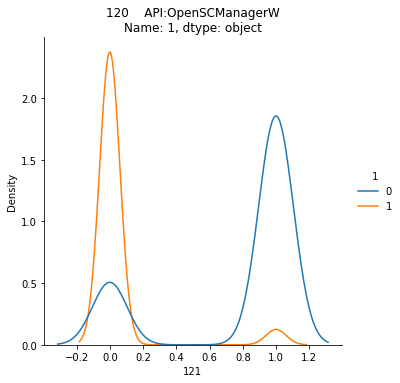

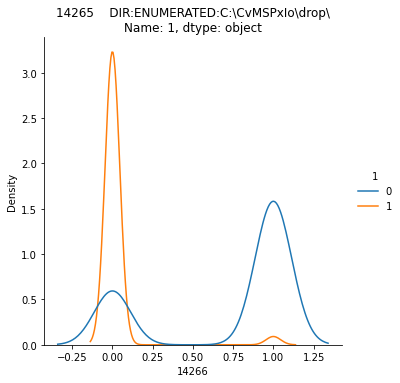

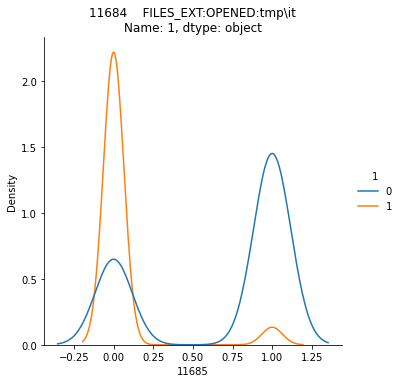

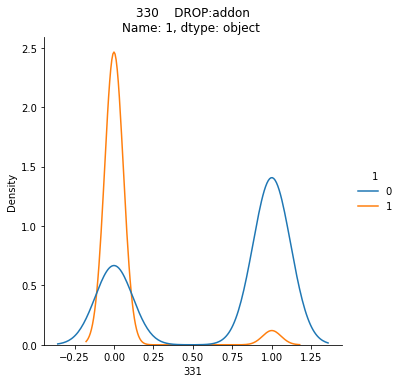

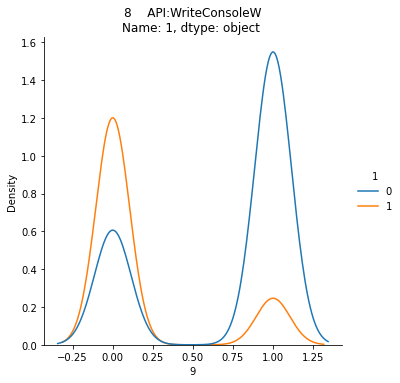

In [ ]:
# Draw the top 5 features distributions

sns.displot(df, x=df[121], hue=df[1], kind="kde").set(title=f"{df_label[df_label[0] == 121][1]}")
sns.displot(df, x=df[14266], hue=df[1], kind="kde").set(title=f"{df_label[df_label[0] == 14266][1]}")
sns.displot(df, x=df[11685], hue=df[1], kind="kde").set(title=f"{df_label[df_label[0] == 11685][1]}")
sns.displot(df, x=df[331], hue=df[1], kind="kde").set(title=f"{df_label[df_label[0] == 331][1]} ")
sns.displot(df, x=df[9], hue=df[1], kind="kde").set(title=f"{df_label[df_label[0] == 9][1]} ")

In [ ]:
# Pick-up the top 50  (46) features with the label
new_df = pd.DataFrame() 
new_df["label"] = df_target
for index in high_score_features:
    name = df_label[df_label[0] == index][1]
    new_df[name] = df.iloc[:,index]
new_df

,label,API:OpenSCManagerW,DIR:ENUMERATED:C:\CvMSPxIo\drop\,FILES_EXT:OPENED:tmp\it,DROP:addon,API:WriteConsoleW,FILES_EXT:WRITTEN:addon,API:Process32FirstW,API:UuidCreate,FILES_EXT:WRITTEN:chm,REG:OPENED:HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Windows\CurrentVersion\Internet Settings\User Agent\,REG:OPENED:HKEY_CURRENT_USER\SOFTWARE\Microsoft\Internet Explorer\Desktop\SafeMode\,API:GetFileType,API:GetVolumePathNamesForVolumeNameW,DROP:chm,API:HttpSendRequestW,FILES_EXT:OPENED:IT,REG:READ:HKEY_LOCAL_MACHINE\SYSTEM\ControlSet001\Services\DMusic\,API:GetUserNameExA,REG:READ:HKEY_LOCAL_MACHINE\SOFTWARE\Classes\MIME\Database\Content Type\application/x-pkcs12\,REG:OPENED:HKEY_LOCAL_MACHINE\Software\Microsoft\Windows NT\CurrentVersion\Image File Execution Options\bb1ed231d5eea329010213128f7f2ca476c4208a25ac323072962176b865b980.exe\,REG:OPENED:HKEY_LOCAL_MACHINE\SOFTWARE\NCH Software\Fling\,FILES_EXT:OPENED:pkt,REG:READ:HKEY_LOCAL_MACHINE\SOFTWARE\Classes\MIME\Database\Content Type\video/x-ms-wmv\,REG:OPENED:HKEY_LOCAL_MACHINE\Software\Microsoft\Windows NT\CurrentVersion\Image File Execution Options\0f05f1b4c08851c95cd81cf018b573cdb9a52f91703376e4d476b83d5112c90f.exe\,API:CoInitializeEx,REG:OPENED:HKEY_LOCAL_MACHINE\Software\Classes\.vsscc\,API:RegQueryValueExW,API:SetUnhandledExceptionFilter,API:NtCreateKey,REG:READ:HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Windows\CurrentVersion\Uninstall\OutlookExpress\,API:RegDeleteValueW,FILES_EXT:READ:chm,API:GetCursorPos,REG:READ:HKEY_LOCAL_MACHINE\SYSTEM\ControlSet001\Services\NetDDE\,API:CryptHashData,REG:READ:HKEY_LOCAL_MACHINE\SYSTEM\WPA\PnP\,REG:OPENED:HKEY_LOCAL_MACHINE\SOFTWARE\Classes\Microsoft.XMLDOM\,API:CryptExportKey,REG:READ:HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\Cryptography\Providers\Trust\FinalPolicy\{00AAC56B-CD44-11D0-8CC2-00C04FC295EE}\,FILES:READ:C:\Documents and Settings\MyUser\Local Settings\Temp\nsl3.tmp\,FILES_EXT:READ:rtf,REG:OPENED:HKEY_CURRENT_USER\Software\MJLSoftware\,REG:READ:HKEY_LOCAL_MACHINE\SOFTWARE\Classes\Interface\{EC0AB1C0-6CAB-11CF-8998-00AA00688B10}\ProxyStubClsid\,REG:WRITTEN:HKEY_CURRENT_USER\Software\Microsoft\Windows\CurrentVersion\Internet Settings\Zones\1\,API:NtLoadDriver,REG:OPENED:HKEY_CLASSES_ROOT\InternetShortcut\shellex\,FILES:OPENED:C:\Documents and Settings\MyUser\Local Settings\Temp\{0612100D-A845-6251-815D-52800B4BABA1}\UDData\language\ZH\,REG:OPENED:HKEY_LOCAL_MACHINE\SOFTWARE\Freedom Scientific\,REG:OPENED:HKEY_CLASSES_ROOT\CLSID\{73FDDC80-AEA9-101A-98A7-00AA00374959}\Implemented Categories\,API:CryptEncrypt,REG:READ:HKEY_LOCAL_MACHINE\SOFTWARE\Classes\.gif\,API:NtQueryInformationFile,REG:OPENED:HKEY_LOCAL_MACHINE\SOFTWARE\Microsoft\MosTrace\CurrentVersion\,REG:OPENED:HKEY_LOCAL_MACHINE\Software\Microsoft\Windows\CurrentVersion\Installer\UserData\S-1-5-21-2000478354-1606980848-1343024091-1003\Products\97D012D95CEAB35469C0D42D7C93131E\,API:DeleteUrlCacheEntryW,API:FindFirstFileExA,API:NtOpenSection,REG:READ:HKEY_LOCAL_MACHINE\SOFTWARE\Classes\Interface\{9F6AA700-D188-11CD-AD48-00AA003C9CB6}\ProxyStubClsid32\,FILES:OPENED:C:\Program Files\Labtec\WebCamWebInstall\,REG:OPENED:HKEY_LOCAL_MACHINE\System\CurrentControlSet\Control\StillImage\,REG:READ:HKEY_LOCAL_MACHINE\SOFTWARE\Classes\Interface\{EAB22AC1-30C1-11CF-A7EB-0000C05BAE0B}\TypeLib\
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

# **Nettoyage et normalisation**

les données sont binaires soit 0 soit 1 donc ce n'est plus nécessaire

# **Construction du Modèle**

In [ ]:
X=new_df[new_df.columns]
y=new_df[new_df.columns[-1]]
new_df[new_df.columns[-1]]
new_df = new_df.rename(columns = {'fit': 'fit_feature'})

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.8, random_state=100)

In [ ]:
X_test.shape

(1220, 62)

In [ ]:
X_train.shape

(304, 62)

In [ ]:
from sklearn import svm
#create the classifier
clf=svm.SVC(kernel='poly', degree=7, random_state=0)
#train the model using the training dataset
clf.fit(X_train,y_train)
#predicting the response 
y_pred=clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9991803278688525


In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred, average="micro"))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred, average="macro"))

Precision: 0.9991803278688525
Recall: 0.9972972972972973


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       1.00      0.99      1.00       185

    accuracy                           1.00      1220
   macro avg       1.00      1.00      1.00      1220
weighted avg       1.00      1.00      1.00      1220



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


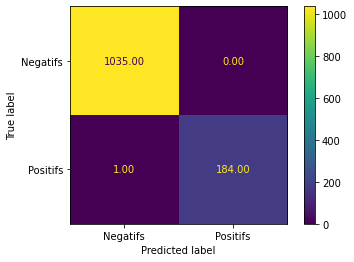

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report, plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test, values_format='.2f', display_labels=['Negatifs', 'Positifs'])

In [ ]:
# predict x_test 

model_prediction = clf.predict(X_test)

In [ ]:
model_prediction

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
y_test.values.reshape(-1,1)

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC

train_sizes, train_scores, valid_scores = learning_curve(clf, X_train, y_train,train_sizes=np.linspace(0.1,1,10),scoring="f1", cv=5)


In [ ]:
train_scores

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

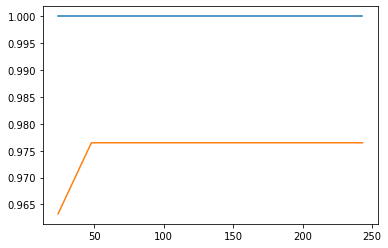

In [ ]:
plt.plot(train_sizes,train_scores.mean(axis=1))
plt.plot(train_sizes,valid_scores.mean(axis=1))

roc_auc_score for SVM:  0.9972972972972973


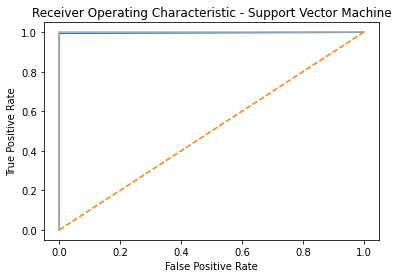

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, model_prediction)

print('roc_auc_score for SVM: ', roc_auc_score(y_test, model_prediction))


plt.title('Receiver Operating Characteristic - Support Vector Machine')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()